This notebook does the following:

1. as
2. 

## Data loading

In [2]:
import pandas as pd
import yaml
from pathlib import Path

with open("../data/processed/finbenthic/trained_models.yaml", "r") as f:
    config = yaml.safe_load(f)


In [61]:
# Read the label (taxon) and model_name (used in filepath)
label, model_name = next(iter(zip(config["labels"], config["ckpts"])))
model_stem = Path(model_name).stem

# Load dataframe. This contains the classifier predictions for each image
df_pred0 = pd.read_csv(f"../predictions/preds_{model_stem}_none.csv")
n_col = df_pred0.shape[1]-2
df_pred0

,y_true,y_pred,Lepidostoma_hirtum,Agapetus_sp,Ameletus_inopinatus,Amphinemura_borealis,Baetis_rhodani,Baetis_vernus_group,Capnopsis_schilleri,Diura_sp,...,Plectrocnemia_sp,Polycentropus_flavomaculatus,Polycentropus_irroratus,Protonemura_sp,Rhyacophila_nubila,Sialis_sp,Silo_pallipes,Simuliidae,Sphaerium_sp,Taeniopteryx_nebulosa
0,Agapetus_sp,Agapetus_sp,1.870165e-14,1.000000e+00,1.264905e-14,6.555582e-13,1.294824e-12,3.251568e-13,7.573725e-15,4.940622e-17,...,4.482611e-12,5.905586e-10,1.087876e-11,5.417439e-18,1.033347e-11,7.247075e-16,1.868241e-13,2.155808e-15,1.885486e-15,2.207936e-13
1,Agapetus_sp,Agapetus_sp,7.671033e-14,1.000000e+00,2.907672e-14,4.046001e-13,1.167482e-12,6.185344e-13,1.672544e-14,5.636902e-17,...,1.540084e-11,7.841931e-10,1.889720e-11,1.234971e-17,3.064483e-11,1.251690e-15,3.053907e-13,5.310598e-15,2.826437e-15,1.558061e-13
2,Agapetus_sp,Agapetus_sp,1.726837e-15,1.000000e+00,4.452108e-15,1.964298e-14,1.014705e-13,1.112399e-13,4.848503e-16,6.521008e-18,...,6.718189e-13,7.091810e-11,8.005117e-13,3.541043e-19,2.233482e-12,1.147284e-16,3.014518e-14,5.742144e-16,3.093038e-16,7.922251e-15
3,Agapetus_sp,Agapetus_sp,6.808442e-15,1.000000e+00,3.922577e-15,3.733510e-14,3.306681e-13,1.235087e-12,1.320899e-15,3.433765e-16,...,2.527842e-12,3.716902e-12,3.479188e-16,2.077302e-18,1.952045e-13,1.733860e-15,2.426771e-13,1.386228e-14,1.002108e-14,1.554443e-13
4,Agapetus_sp,Agapetus_sp,5.085689e-15,1.000000e+00,3.384208e-15,4.806482e-15,1.806687e-13,2.980359e-13,1.068049e-16,8.507176e-17,...,1.015071e-12,2.205904e-12,1.967608e-16,1.492086e-19,3.556173e-14,3.178259e-16,9.146208e-14,8.265097e-15,3.512757e-15,3.414124e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100943,Taeniopteryx_nebulosa,Taeniopteryx_nebulosa,1.338218e-16,6.757644e-16,5.702153e-16,3.606527e-11,7.392843e-12,1.451859e-11,9.211020e-17,3.018706e-10,...,5.860990e-14,3.521168e-15,1.485574e-15,7.915828e-08,2.829294e-15,1.012750e-13,2.926106e-16,2.051896e-16,1.019745e-13,9.999998e-01
100944,Taeniopteryx_nebulosa,Taeniopteryx_nebulosa,4.190959e-16,9.560572e-13,3.246367e-14,6.357809e-11,8.906383e-10,9.750543e-11,1.584465e-15,3.181348e-11,...,4.643348e-13,3.137242e-13,7.252147e-13,9.913811e-10,5.300620e-15,1.236704e-12,6.376004e-14,5.210606e-14,7.342505e-13,1.000000e+00
100945,Taeniopteryx_nebulosa,Taeniopteryx_nebulosa,1.556826e-16,6.928439e-15,1.047180e-14,5.148101e-11,3.681098e-11,5.316598e-11,1.179682e-15,1.252843e-09,...,8.443578e-14,1.656312e-14,5.000200e-15,5.499337e-08,5.002718e-15,1.729225e-13,1.070484e-15,3.696422e-15,5.586693e-13,9.999999e-01
100946,Taeniopteryx_nebulosa,Taeniopteryx_nebulosa,5.328206e-17,4.534103e-15,1.456040e-16,3.369835e-13,3.299738e-13,1.660295e-13,2.990414e-18,7.018287e-14,...,2.316951e-15,1.339010e-16,1.493495e-15,1.082929e-12,2.648897e-16,2.503244e-15,1.672047e-17,2.386897e-17,7.426693e-16,1.000000e+00


In [62]:
# Load the reference dataframe. This contains the train test splits
df_ref = pd.read_csv(f"../data/processed/finbenthic/leave-one-out/02_finbenthic2_outliers_{label}.csv")
df_ref

,Unnamed: 0,individual,taxon,species,genus,family,order,img,0
0,0,Agapetus1,Agapetus_sp,NaN,Agapetus,Glossosomatidae,Trichoptera,1-Agapetus1.1.2016-08-48-34-372709000000-utc.png,test
1,1,Agapetus1,Agapetus_sp,NaN,Agapetus,Glossosomatidae,Trichoptera,1-Agapetus1.1.2016-08-48-33-972737000000-utc.png,test
2,2,Agapetus1,Agapetus_sp,NaN,Agapetus,Glossosomatidae,Trichoptera,1-Agapetus1.1.2016-08-48-34-729001000000-utc.png,test
3,3,Agapetus1,Agapetus_sp,NaN,Agapetus,Glossosomatidae,Trichoptera,0-Agapetus1.1.2016-08-48-34-496196000000-utc.png,test
4,4,Agapetus1,Agapetus_sp,NaN,Agapetus,Glossosomatidae,Trichoptera,0-Agapetus1.1.2016-08-48-34-088420000000-utc.png,test
...,...,...,...,...,...,...,...,...,...
459999,459999,Taeniopteryx_neb99,Taeniopteryx_nebulosa,Taeniopteryx_neb,Taeniopteryx,Taeniopterygidae,Plecoptera,1-Taeniopteryx_neb99.1.2016-06-03-00-460755000...,test
460000,460000,Taeniopteryx_neb99,Taeniopteryx_nebulosa,Taeniopteryx_neb,Taeniopteryx,Taeniopterygidae,Plecoptera,1-Taeniopteryx_neb99.1.2016-06-02-57-281968000...,test
460001,460001,Taeniopteryx_neb99,Taeniopteryx_nebulosa,Taeniopteryx_neb,Taeniopteryx,Taeniopterygidae,Plecoptera,1-Taeniopteryx_neb99.1.2016-06-03-00-160521000...,test
460002,460002,Taeniopteryx_neb99,Taeniopteryx_nebulosa,Taeniopteryx_neb,Taeniopteryx,Taeniopterygidae,Plecoptera,0-Taeniopteryx_neb99.1.2016-06-02-58-331857000...,test


In [5]:
# Split the reference to test and train sets. Test set is later combined with the predictions
df_ref_test = df_ref[df_ref["0"] == "test"].reset_index(drop=True)
df_ref_train = df_ref[df_ref["0"] == "train"].reset_index(drop=True)
assert (df_pred0.y_true == df_ref_test.taxon).all()

In [80]:
# Get the image filenames from df_ref_test and combine with predictions
df_pred = pd.concat((df_ref_test[["img"]], df_pred0), axis=1).set_index("img")

# Set a ground truth boolean whether the image is in the outlier class
def is_outlier(s):
    if s == label:
        return True
    return False

df_pred = df_pred.assign(is_outlier = df_pred["y_true"].map(is_outlier)*1)
df_pred

,y_true,y_pred,Lepidostoma_hirtum,Agapetus_sp,Ameletus_inopinatus,Amphinemura_borealis,Baetis_rhodani,Baetis_vernus_group,Capnopsis_schilleri,Diura_sp,...,Polycentropus_flavomaculatus,Polycentropus_irroratus,Protonemura_sp,Rhyacophila_nubila,Sialis_sp,Silo_pallipes,Simuliidae,Sphaerium_sp,Taeniopteryx_nebulosa,is_outlier
img,,,,,,,,,,,,,,,,,,,,,
1-Agapetus1.1.2016-08-48-34-372709000000-utc.png,Agapetus_sp,Agapetus_sp,1.870165e-14,1.000000e+00,1.264905e-14,6.555582e-13,1.294824e-12,3.251568e-13,7.573725e-15,4.940622e-17,...,5.905586e-10,1.087876e-11,5.417439e-18,1.033347e-11,7.247075e-16,1.868241e-13,2.155808e-15,1.885486e-15,2.207936e-13,0
1-Agapetus1.1.2016-08-48-33-972737000000-utc.png,Agapetus_sp,Agapetus_sp,7.671033e-14,1.000000e+00,2.907672e-14,4.046001e-13,1.167482e-12,6.185344e-13,1.672544e-14,5.636902e-17,...,7.841931e-10,1.889720e-11,1.234971e-17,3.064483e-11,1.251690e-15,3.053907e-13,5.310598e-15,2.826437e-15,1.558061e-13,0
1-Agapetus1.1.2016-08-48-34-729001000000-utc.png,Agapetus_sp,Agapetus_sp,1.726837e-15,1.000000e+00,4.452108e-15,1.964298e-14,1.014705e-13,1.112399e-13,4.848503e-16,6.521008e-18,...,7.091810e-11,8.005117e-13,3.541043e-19,2.233482e-12,1.147284e-16,3.014518e-14,5.742144e-16,3.093038e-16,7.922251e-15,0
0-Agapetus1.1.2016-08-48-34-496196000000-utc.png,Agapetus_sp,Agapetus_sp,6.808442e-15,1.000000e+00,3.922577e-15,3.733510e-14,3.306681e-13,1.235087e-12,1.320899e-15,3.433765e-16,...,3.716902e-12,3.479188e-16,2.077302e-18,1.952045e-13,1.733860e-15,2.426771e-13,1.386228e-14,1.002108e-14,1.554443e-13,0
0-Agapetus1.1.2016-08-48-34-088420000000-utc.png,Agapetus_sp,Agapetus_sp,5.085689e-15,1.000000e+00,3.384208e-15,4.806482e-15,1.806687e-13,2.980359e-13,1.068049e-16,8.507176e-17,...,2.205904e-12,1.967608e-16,1.492086e-19,3.556173e-14,3.178259e-16,9.146208e-14,8.265097e-15,3.512757e-15,3.414124e-14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1-Taeniopteryx_neb99.1.2016-06-03-00-460755000000-utc.png,Taeniopteryx_nebulosa,Taeniopteryx_nebulosa,1.338218e-16,6.757644e-16,5.702153e-16,3.606527e-11,7.392843e-12,1.451859e-11,9.211020e-17,3.018706e-10,...,3.521168e-15,1.485574e-15,7.915828e-08,2.829294e-15,1.012750e-13,2.926106e-16,2.051896e-16,1.019745e-13,9.999998e-01,0
1-Taeniopteryx_neb99.1.2016-06-02-57-281968000000-utc.png,Taeniopteryx_nebulosa,Taeniopteryx_nebulosa,4.190959e-16,9.560572e-13,3.246367e-14,6.357809e-11,8.906383e-10,9.750543e-11,1.584465e-15,3.181348e-11,...,3.137242e-13,7.252147e-13,9.913811e-10,5.300620e-15,1.236704e-12,6.376004e-14,5.210606e-14,7.342505e-13,1.000000e+00,0
1-Taeniopteryx_neb99.1.2016-06-03-00-160521000000-utc.png,Taeniopteryx_nebulosa,Taeniopteryx_nebulosa,1.556826e-16,6.928439e-15,1.047180e-14,5.148101e-11,3.681098e-11,5.316598e-11,1.179682e-15,1.252843e-09,...,1.656312e-14,5.000200e-15,5.499337e-08,5.002718e-15,1.729225e-13,1.070484e-15,3.696422e-15,5.586693e-13,9.999999e-01,0


In [64]:

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
def confusion_matrixX(y_true, 
                      y_pred, 
                      classes, 
                      figsize=(15,15), 
                      fonts=(18,10,18), 
                      rotate=False,
                      grid=False,
                      normalize='true'):

    # Check the inputs
    s_true = set(np.unique(y_true))
    s_pred = set(np.unique(y_pred))

    if classes == 'union':
        classes = sorted(list(s_true | s_pred))

    if len((s_true | s_pred) - set(classes)) > 0:
        warnings.warn(f"The inputs contain classes not present in the class list: {(s_true | s_pred) - set(classes)}")

    cm = confusion_matrix(y_true, 
                          y_pred, 
                          labels=classes,
                          normalize=normalize)
    
    if normalize:
        cm = cm*100
    fig, ax = plt.subplots(figsize=figsize)

    mask = np.zeros_like(cm)
    mask[cm==0] = 1
    sns.heatmap(cm, 
                annot=True, 
                annot_kws={"size": fonts[0]},
                fmt='.0f', 
                cmap="YlGnBu",
                xticklabels=classes, 
                yticklabels=classes,
                mask=mask,
                square=True, 
                cbar=False,
                ax=ax)
    
    if grid:
        ax.set_axisbelow(True)
        ax.yaxis.grid(color='gray', linestyle='dashed')
        ax.xaxis.grid(color='gray', linestyle='dashed')

    ax.set_ylabel('True label', size=fonts[2])
    ax.set_xlabel('Predicted label', size=fonts[2])
    ax.yaxis.set_ticks_position('none') 
    ax.xaxis.set_ticks_position('none') 
    
    if rotate:
        if isinstance(rotate, list):
            rot_x = rotate[0]
            rot_y = rotate[1]
        else:
            rot_x = rot_y = rotate
        plt.setp(ax.get_yticklabels(), rotation=rot_x, ha="right", rotation_mode="anchor", size=fonts[1])
        plt.setp(ax.get_xticklabels(), rotation=rot_y, ha="right", rotation_mode="anchor", size=fonts[1])
    else:
        plt.setp(ax.get_yticklabels(), size=fonts[1])
        plt.setp(ax.get_xticklabels(), size=fonts[1])


from sklearn.metrics import classification_report
def classification_reportX(*args, 
                           figsize=None, 
                           fonts=(12,10,10),
                           rotate=True, 
                           bbox_anchor=(1.15,0.8), 
                           **kwargs):
    """Extends classification report by adding an useful plot for the performance across classes"""
    r = classification_report(*args, **kwargs, output_dict=True)
    rdf0 = pd.DataFrame(r)
    rdf = rdf0.T.iloc[:-3,:].sort_values('support',ascending=False)
    fig, ax1 = plt.subplots(figsize=figsize)
    ax2 = ax1.twinx()

    xbar = range(len(rdf))
    ax1.bar(xbar,rdf['support'], alpha=0.2)
    ax2.plot(rdf['f1-score'], 'ro', label='f1-score')
    ax2.plot(rdf['precision'], 'g*', label='precision', alpha=0.5)
    ax2.plot(rdf['recall'], 'b*', label='recall', alpha=0.5)

    ax2.vlines(xbar, rdf['f1-score'], rdf['precision'], 'g')
    ax2.vlines(xbar, rdf['f1-score'], rdf['recall'], 'b')

    ax2.hlines(rdf0['weighted avg']['f1-score'], 0,len(rdf), color='r', linestyle='--', label='weighted f1-score')
    ax2.hlines(rdf0['macro avg']['f1-score'], 0,len(rdf), color='r', linestyle='-.', label='macro f1-score')
    ax2.hlines(rdf0['accuracy']['recall'], 0,len(rdf), color='b', linestyle='--', label='accuracy')
    
    if rotate:

        plt.setp(ax1.get_xticklabels(), 
                 rotation=45, 
                 ha="right", 
                 rotation_mode="anchor",
                 size=fonts[1])

    fig.legend(bbox_to_anchor=bbox_anchor,
               prop={"size": fonts[2]})
    
    ax2.set_ylabel("Score", size=fonts[0])
    ax1.set_ylabel("Support", size=fonts[0])
    plt.setp(ax1.get_yticklabels(),
             size=fonts[0])
    plt.setp(ax2.get_yticklabels(),
             size=fonts[0])
    
    return classification_report(*args, **kwargs)

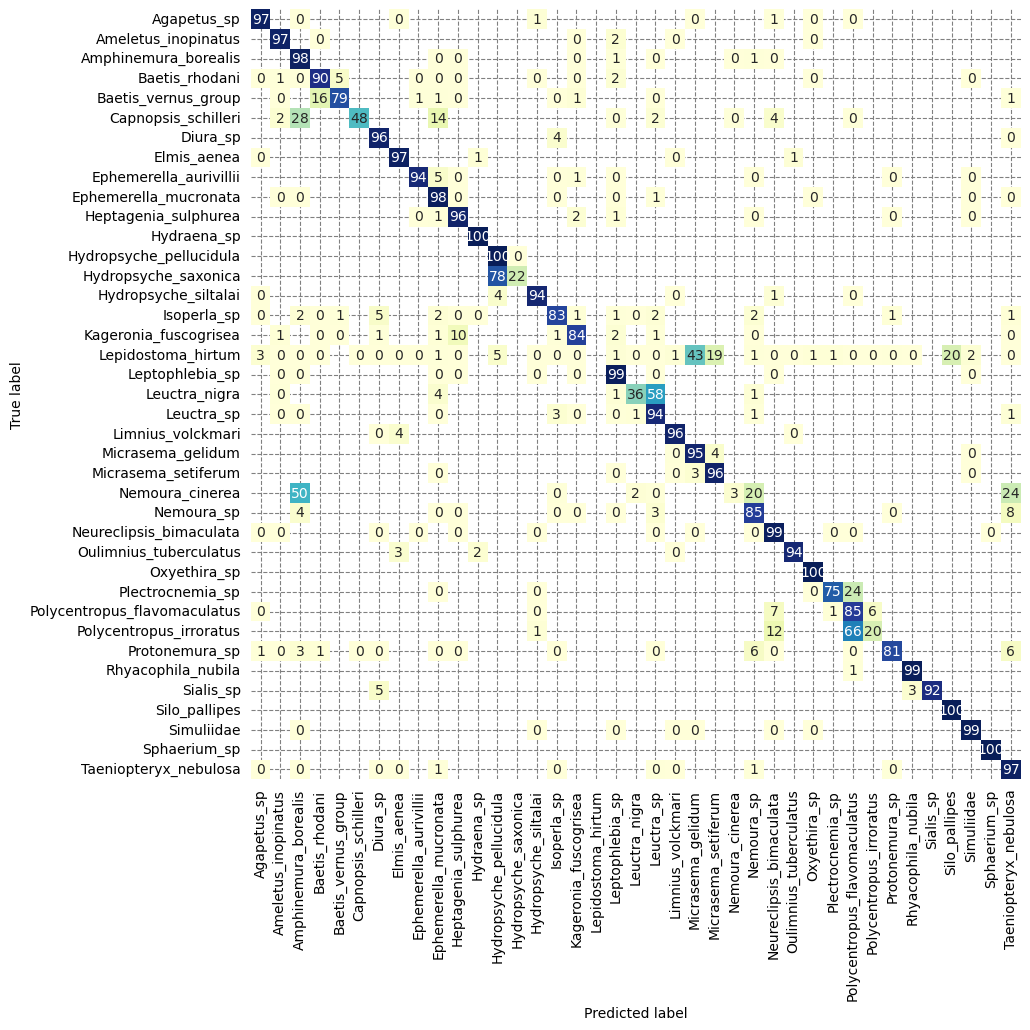

In [86]:
confusion_matrixX(df_pred.y_true, df_pred.y_pred, classes="union", figsize=(10,10), fonts=(10,10,10), grid=True)

## DNA data loading

In [66]:
# Load the synthetic DNA metabarcoding dataset. It is assumed that we can identify the taxons from these sequences using reference databases
metabc_sample = pd.read_csv("../data/raw/fb2dna.csv").set_index("taxon")
metabc_sample

,bold_record,seq
taxon,,
Agapetus_sp,TRIFI570-11,AACGTTATATTTCATTTTTGGAATTTGAAGAGGTATAGTAGGAACT...
Ameletus_inopinatus,FIEPT199-16,CACTCTTTATTTTATTTTTGGGGCATGAGCTGGAATGGTGGGGACT...
Amphinemura_borealis,TRIFI1309-16,AACTCTTTACTTCATTTTCGGAGCTTGATCCGGAATAGTCGGGACT...
Baetis_rhodani,FIEPT203-16,TACTCTATATTTCATTTTTGGTGCTTGGGCAGGTATGGTAGGGACC...
Baetis_vernus_group,FIEPT207-16,TACGTTATATTTTATTTTCGGTGCCTGATCGGGTATAGTAGGAACG...
Capnopsis_schilleri,FIEPT283-16,AACATTATATTTTATCTTTGGAGCTTGGGCAGGGATAGTAGGAACT...
Diura_sp,FIEPT060-11,TACACTATACTTTATTTTTGGAGCATGATCTGGAATAGTAGGGACT...
Elmis_aenea,COLFF808-13,AACACTTTATTTTATTCTAGGATCATGATCAGGAATGTTAGGAATA...
Ephemerella_aurivillii,EPHFI036-11,AACTTTATATTTCATTTTTGGGGCATGATCAGGTATAGTGGGGACT...


In [67]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO, AlignIO
from Bio.Align.Applications import MuscleCommandline
from scipy.spatial.distance import cdist

# Turn to SeqRecord format
records = []
for i, row in metabc_sample.iterrows():
    record = SeqRecord(
        Seq(row.seq),
        id=row.name
    )
    records.append(record)

# Write to FASTA
with open("otus_fb2.fasta", "w") as output_handle:
    SeqIO.write(records, output_handle, "fasta")

import subprocess

# Align sequences with muscle
subprocess.run([r"..\muscle.exe",
                    "-align", "otus_fb2.fasta", 
                    "-output", "otus_fb2_align.fasta"])

CompletedProcess(args=['..\\muscle.exe', '-align', 'otus_fb2.fasta', '-output', 'otus_fb2_align.fasta'], returncode=0)

In [71]:
# Load the aligned sequences and add them to the dataframe
aligned = [x for x in SeqIO.parse("otus_fb2_align.fasta", "fasta")]
for a in aligned:
    metabc_sample.loc[a.id, "seq_align"] = str(a.seq)
metabc_sample

,bold_record,seq,seq_align
taxon,,,
Agapetus_sp,TRIFI570-11,AACGTTATATTTCATTTTTGGAATTTGAAGAGGTATAGTAGGAACT...,AACGTTATATTTCATTTTTGGAATTTGAAGAGGTATAGTAGGAACT...
Ameletus_inopinatus,FIEPT199-16,CACTCTTTATTTTATTTTTGGGGCATGAGCTGGAATGGTGGGGACT...,CACTCTTTATTTTATTTTTGGGGCATGAGCTGGAATGGTGGGGACT...
Amphinemura_borealis,TRIFI1309-16,AACTCTTTACTTCATTTTCGGAGCTTGATCCGGAATAGTCGGGACT...,AACTCTTTACTTCATTTTCGGAGCTTGATCCGGAATAGTCGGGACT...
Baetis_rhodani,FIEPT203-16,TACTCTATATTTCATTTTTGGTGCTTGGGCAGGTATGGTAGGGACC...,TACTCTATATTTCATTTTTGGTGCTTGGGCAGGTATGGTAGGGACC...
Baetis_vernus_group,FIEPT207-16,TACGTTATATTTTATTTTCGGTGCCTGATCGGGTATAGTAGGAACG...,TACGTTATATTTTATTTTCGGTGCCTGATCGGGTATAGTAGGAACG...
Capnopsis_schilleri,FIEPT283-16,AACATTATATTTTATCTTTGGAGCTTGGGCAGGGATAGTAGGAACT...,AACATTATATTTTATCTTTGGAGCTTGGGCAGGGATAGTAGGAACT...
Diura_sp,FIEPT060-11,TACACTATACTTTATTTTTGGAGCATGATCTGGAATAGTAGGGACT...,TACACTATACTTTATTTTTGGAGCATGATCTGGAATAGTAGGGACT...
Elmis_aenea,COLFF808-13,AACACTTTATTTTATTCTAGGATCATGATCAGGAATGTTAGGAATA...,AACACTTTATTTTATTCTAGGATCATGATCAGGAATGTTAGGAATA...
Ephemerella_aurivillii,EPHFI036-11,AACTTTATATTTCATTTTTGGGGCATGATCAGGTATAGTGGGGACT...,AACTTTATATTTCATTTTTGGGGCATGATCAGGTATAGTGGGGACT...


In [72]:
# Create a list of id-sequence pairs
seqs = []
for i,row in metabc_sample.iterrows():
    seqs.append({"id": row.name,
                 "seq": row.seq_align})
seqs

[{'id': 'Agapetus_sp',
  'seq': 'AACGTTATATTTCATTTTTGGAATTTGAAGAGGTATAGTAGGAACTTCTTTAAGAATATTAATTCGAAGAGAATTAGGGACTAACAGATTTTTAATTGGAAATGATCAAATTTATAATGTTATTGTAACTGCTCACGCATTCATTATAATTTTTTTTATAGTTATACCAATTATAATTGGGGGATTTGGAAACTGATTAGTACCTTTAATACTAGGAGCCCCTGATATGGCTTTCCCACGATTAAATAATATAAGATTTTGATTTTTACCCCCCTCAATTACATTATTAATTATAGGAAGTCTTGTAGAAAGAGGAGCTGGAACAGGATGAACGGTATACCCTCCACTTTCCTCTACTATTGCTCATATCGGGGGATCTGTTGACTTATCAATTTTTTCATTACATTTAGCTGGAATTTCCTCTATTTTAGGAGCAGTAAATTTTATTTCAACAATAATTAATATACGATCAAATAGAATAACAATAGAAAAAATACCACTTTTTGTATGGTCTGTATTTATTACAGCTATTCTTTTGTTGCTTTCCCTTCCTGTACTTGCAGGAGCTATTACAATACTTCTTACAGACCGTAATCTTAACACTTCCTTTTTTAACCCTGCTGGGGGAGGAGACCCTATTTTATACCAACATCTATTT'},
 {'id': 'Ameletus_inopinatus',
  'seq': 'CACTCTTTATTTTATTTTTGGGGCATGAGCTGGAATGGTGGGGACTTCTTTAAGCCTTCTCATCCGAGCAGAATTAGGTCAACCCGGGTCTCTTATTGGAGATGACCAAATTTATAATGTAATTGTAACTGCTCATGCCTTTGTTATAATTTTCTTTATAGTTATACCTATTATAATTGGAGGATTTGGTAATTGACTTGTACCTTTAATACTAGGAGCTCCTGATATAGCTTTCCCTCGTATAAACAATATAAGATTTTGATT

In [74]:
def jaccard(a,b):
    a = np.array([x for x in a])
    b = np.array([x for x in b])
    return np.sum(a == b)/len(a)

# Calculate a distance matrix for all sequences
D = pd.DataFrame(index=metabc_sample.index, columns=metabc_sample.index)
for s1 in seqs:
    for s2 in seqs:
        d = jaccard(s1["seq"], s2["seq"])
        D.loc[s1["id"], s2["id"]] = d
D

taxon,Agapetus_sp,Ameletus_inopinatus,Amphinemura_borealis,Baetis_rhodani,Baetis_vernus_group,Capnopsis_schilleri,Diura_sp,Elmis_aenea,Ephemerella_aurivillii,Ephemerella_mucronata,...,Plectrocnemia_sp,Polycentropus_flavomaculatus,Polycentropus_irroratus,Protonemura_sp,Rhyacophila_nubila,Sialis_sp,Silo_pallipes,Simuliidae,Sphaerium_sp,Taeniopteryx_nebulosa
taxon,,,,,,,,,,,,,,,,,,,,,
Agapetus_sp,1.0,0.74924,0.75228,0.727964,0.718845,0.741641,0.738602,0.756839,0.779635,0.744681,...,0.74772,0.741641,0.711246,0.734043,0.799392,0.762918,0.778116,0.721884,0.642857,0.768997
Ameletus_inopinatus,0.74924,1.0,0.785714,0.782675,0.75076,0.779635,0.797872,0.758359,0.816109,0.791793,...,0.709726,0.696049,0.680851,0.787234,0.770517,0.803951,0.731003,0.738602,0.645897,0.802432
Amphinemura_borealis,0.75228,0.785714,1.0,0.74924,0.74772,0.820669,0.803951,0.765957,0.776596,0.773556,...,0.711246,0.694529,0.68693,0.817629,0.790274,0.791793,0.761398,0.75076,0.651976,0.835866
Baetis_rhodani,0.727964,0.782675,0.74924,1.0,0.799392,0.74924,0.741641,0.753799,0.755319,0.75228,...,0.693009,0.68541,0.670213,0.772036,0.741641,0.790274,0.734043,0.691489,0.674772,0.781155
Baetis_vernus_group,0.718845,0.75076,0.74772,0.799392,1.0,0.740122,0.75076,0.743161,0.758359,0.772036,...,0.693009,0.673252,0.676292,0.775076,0.758359,0.764438,0.727964,0.699088,0.664134,0.778116
Capnopsis_schilleri,0.741641,0.779635,0.820669,0.74924,0.740122,1.0,0.800912,0.762918,0.779635,0.762918,...,0.697568,0.677812,0.671733,0.802432,0.764438,0.794833,0.729483,0.721884,0.639818,0.831307
Diura_sp,0.738602,0.797872,0.803951,0.741641,0.75076,0.800912,1.0,0.731003,0.782675,0.758359,...,0.68997,0.668693,0.682371,0.802432,0.759878,0.755319,0.715805,0.726444,0.639818,0.806991
Elmis_aenea,0.756839,0.758359,0.765957,0.753799,0.743161,0.762918,0.731003,1.0,0.759878,0.735562,...,0.734043,0.711246,0.699088,0.776596,0.781155,0.790274,0.734043,0.712766,0.647416,0.790274
Ephemerella_aurivillii,0.779635,0.816109,0.776596,0.755319,0.758359,0.779635,0.782675,0.759878,1.0,0.817629,...,0.708207,0.671733,0.677812,0.768997,0.768997,0.779635,0.738602,0.726444,0.653495,0.794833


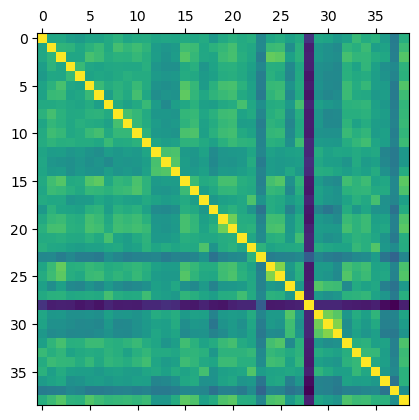

In [75]:
plt.matshow(D.values.astype(np.float64))

## Computations

In [81]:
# Calculate the classification entropy from predictions
predX = df_pred.values[:,2:n_col].astype(np.float64)
H = -np.sum(predX*np.log(predX),axis=1)
df_pred["H"] = H

In [82]:
# Calculate the ratio between max probable class and the second most probable
largest = predX.max(axis=1)
second_largest = np.partition(predX, -2, axis=1)[:, -2]
r = second_largest/largest
df_pred["r"] = r
df_pred

,y_true,y_pred,Lepidostoma_hirtum,Agapetus_sp,Ameletus_inopinatus,Amphinemura_borealis,Baetis_rhodani,Baetis_vernus_group,Capnopsis_schilleri,Diura_sp,...,Protonemura_sp,Rhyacophila_nubila,Sialis_sp,Silo_pallipes,Simuliidae,Sphaerium_sp,Taeniopteryx_nebulosa,is_outlier,H,r
img,,,,,,,,,,,,,,,,,,,,,
1-Agapetus1.1.2016-08-48-34-372709000000-utc.png,Agapetus_sp,Agapetus_sp,1.870165e-14,1.000000e+00,1.264905e-14,6.555582e-13,1.294824e-12,3.251568e-13,7.573725e-15,4.940622e-17,...,5.417439e-18,1.033347e-11,7.247075e-16,1.868241e-13,2.155808e-15,1.885486e-15,2.207936e-13,0,1.377983e-08,5.905586e-10
1-Agapetus1.1.2016-08-48-33-972737000000-utc.png,Agapetus_sp,Agapetus_sp,7.671033e-14,1.000000e+00,2.907672e-14,4.046001e-13,1.167482e-12,6.185344e-13,1.672544e-14,5.636902e-17,...,1.234971e-17,3.064483e-11,1.251690e-15,3.053907e-13,5.310598e-15,2.826437e-15,1.558061e-13,0,1.927591e-08,7.841931e-10
1-Agapetus1.1.2016-08-48-34-729001000000-utc.png,Agapetus_sp,Agapetus_sp,1.726837e-15,1.000000e+00,4.452108e-15,1.964298e-14,1.014705e-13,1.112399e-13,4.848503e-16,6.521008e-18,...,3.541043e-19,2.233482e-12,1.147284e-16,3.014518e-14,5.742144e-16,3.093038e-16,7.922251e-15,0,2.370771e-09,7.091810e-11
0-Agapetus1.1.2016-08-48-34-496196000000-utc.png,Agapetus_sp,Agapetus_sp,6.808442e-15,1.000000e+00,3.922577e-15,3.733510e-14,3.306681e-13,1.235087e-12,1.320899e-15,3.433765e-16,...,2.077302e-18,1.952045e-13,1.733860e-15,2.426771e-13,1.386228e-14,1.002108e-14,1.554443e-13,0,1.354992e-09,4.366796e-11
0-Agapetus1.1.2016-08-48-34-088420000000-utc.png,Agapetus_sp,Agapetus_sp,5.085689e-15,1.000000e+00,3.384208e-15,4.806482e-15,1.806687e-13,2.980359e-13,1.068049e-16,8.507176e-17,...,1.492086e-19,3.556173e-14,3.178259e-16,9.146208e-14,8.265097e-15,3.512757e-15,3.414124e-14,0,4.336853e-10,8.664437e-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1-Taeniopteryx_neb99.1.2016-06-03-00-460755000000-utc.png,Taeniopteryx_nebulosa,Taeniopteryx_nebulosa,1.338218e-16,6.757644e-16,5.702153e-16,3.606527e-11,7.392843e-12,1.451859e-11,9.211020e-17,3.018706e-10,...,7.915828e-08,2.829294e-15,1.012750e-13,2.926106e-16,2.051896e-16,1.019745e-13,9.999998e-01,0,3.820999e-06,5.601076e-01
1-Taeniopteryx_neb99.1.2016-06-02-57-281968000000-utc.png,Taeniopteryx_nebulosa,Taeniopteryx_nebulosa,4.190959e-16,9.560572e-13,3.246367e-14,6.357809e-11,8.906383e-10,9.750543e-11,1.584465e-15,3.181348e-11,...,9.913811e-10,5.300620e-15,1.236704e-12,6.376004e-14,5.210606e-14,7.342505e-13,1.000000e+00,0,4.567230e-07,7.081911e-01
1-Taeniopteryx_neb99.1.2016-06-03-00-160521000000-utc.png,Taeniopteryx_nebulosa,Taeniopteryx_nebulosa,1.556826e-16,6.928439e-15,1.047180e-14,5.148101e-11,3.681098e-11,5.316598e-11,1.179682e-15,1.252843e-09,...,5.499337e-08,5.002718e-15,1.729225e-13,1.070484e-15,3.696422e-15,5.586693e-13,9.999999e-01,0,2.571088e-06,8.342557e-01


In [83]:
# Order the closest neighbors 
candidate_order = D.loc[label].sort_values(ascending=False).drop(label)
candidate_order

taxon
Micrasema_gelidum               0.826748
Silo_pallipes                    0.81459
Rhyacophila_nubila              0.775076
Nemoura_cinerea                 0.764438
Agapetus_sp                     0.759878
Isoperla_sp                     0.759878
Hydraena_sp                     0.756839
Nemoura_sp                      0.755319
Sialis_sp                       0.755319
Amphinemura_borealis            0.753799
Limnius_volckmari               0.753799
Ameletus_inopinatus              0.75076
Diura_sp                         0.75076
Ephemerella_aurivillii           0.74772
Oulimnius_tuberculatus          0.744681
Leuctra_sp                      0.741641
Protonemura_sp                  0.740122
Hydropsyche_pellucidula         0.738602
Ephemerella_mucronata           0.735562
Leuctra_nigra                   0.734043
Elmis_aenea                     0.734043
Heptagenia_sulphurea            0.734043
Taeniopteryx_nebulosa           0.732523
Hydropsyche_siltalai            0.732523
Plectrocne

In [90]:
# Re-order the sorted predictions based on DNA proximity
block_list = []
for candidate in candidate_order.index:
    block = df_pred.sort_values("H", ascending=False).query("y_pred == @candidate")[["H", "is_outlier"]]
    block_list.append(block)

sorted_df_dna = pd.concat(block_list)
sorted_df_dna

,H,is_outlier
img,,
1-Lepidostoma_hir95.1.2016-08-31-40-950983000000-utc.png,2.399719e+00,1
1-Lepidostoma_hir199.1.2016-08-42-25-143350000000-utc.png,2.354374e+00,1
1-Lepidostoma_hir95.1.2016-08-31-41-131402000000-utc.png,2.247340e+00,1
1-Lepidostoma_hir240.1.2016-09-53-25-237208000000-utc.png,2.195093e+00,1
1-Lepidostoma_hir233.1.2016-09-51-33-422921000000-utc.png,2.071346e+00,1
...,...,...
1-Agapetus139.1.2016-10-29-38-145821000000-utc.png,7.245739e-12,0
1-Agapetus184.1.2016-10-50-22-313603000000-utc.png,5.916299e-12,0
1-Agapetus88.1.2016-10-05-24-556232000000-utc.png,5.692965e-12,0


In [89]:
candidate_order.head(5).index

Index(['Micrasema_gelidum', 'Silo_pallipes', 'Rhyacophila_nubila',
       'Nemoura_cinerea', 'Agapetus_sp'],
      dtype='object', name='taxon')

In [85]:
sorted_df_H = df_pred.sort_values(by="H", ascending=False)[["H", "is_outlier"]]
sorted_df_r = df_pred.sort_values(by="r", ascending=False)[["r", "is_outlier"]]
sorted_df_H

,H,is_outlier
img,,
1-Lepidostoma_hir200.1.2016-08-42-46-009622000000-utc.png,2.523733e+00,1
1-Lepidostoma_hir200.1.2016-08-42-45-961531000000-utc.png,2.484859e+00,1
1-Lepidostoma_hir95.1.2016-08-31-41-003400000000-utc.png,2.475724e+00,1
1-Ephemerella_muc285.1.2016-07-20-29-839603000000-utc.png,2.448588e+00,0
0-Lepidostoma_hir197.1.2016-08-41-53-684390000000-utc.png,2.417066e+00,1
...,...,...
1-Sphaerium103.1.2016-11-59-49-195066000000-utc.png,3.987717e-15,0
0-Oxyethira55.2.2016-06-51-50-588136000000-utc.png,3.602495e-15,0
1-Oxyethira32.1.2016-11-19-21-018354000000-utc.png,3.444152e-15,0


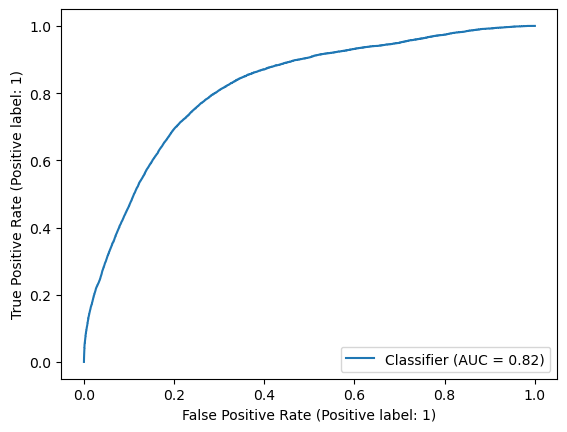

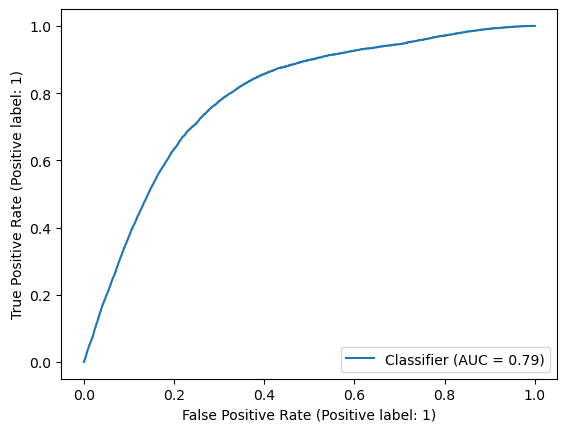

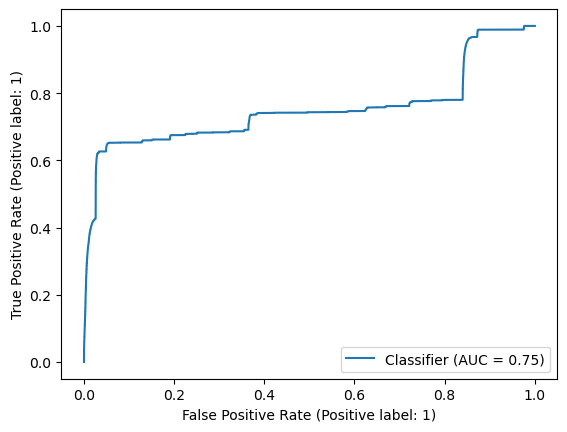

In [87]:
y_pred = np.linspace(1,0, len(sorted_df_H))
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(
    sorted_df_H.is_outlier,
    y_pred
)
RocCurveDisplay.from_predictions(
    sorted_df_r.is_outlier,
    y_pred
)
RocCurveDisplay.from_predictions(
    sorted_df_dna.is_outlier,
    y_pred
)

c:\Users\E1007914\AppData\Local\miniconda3\envs\taxonomist\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\E1007914\AppData\Local\miniconda3\envs\taxonomist\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\E1007914\AppData\Local\miniconda3\envs\taxonomist\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\E1007914\AppData\Local\miniconda3\envs\taxonomist\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categoric

<Axes: xlabel='H', ylabel='r'>

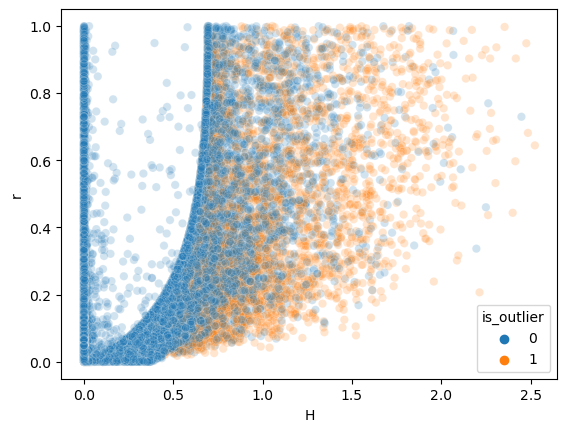

In [14]:
sns.scatterplot(df_pred,
                x="H",
                y="r",
                alpha=0.2,
                hue="is_outlier")

c:\Users\E1007914\AppData\Local\miniconda3\envs\taxonomist\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\E1007914\AppData\Local\miniconda3\envs\taxonomist\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\E1007914\AppData\Local\miniconda3\envs\taxonomist\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


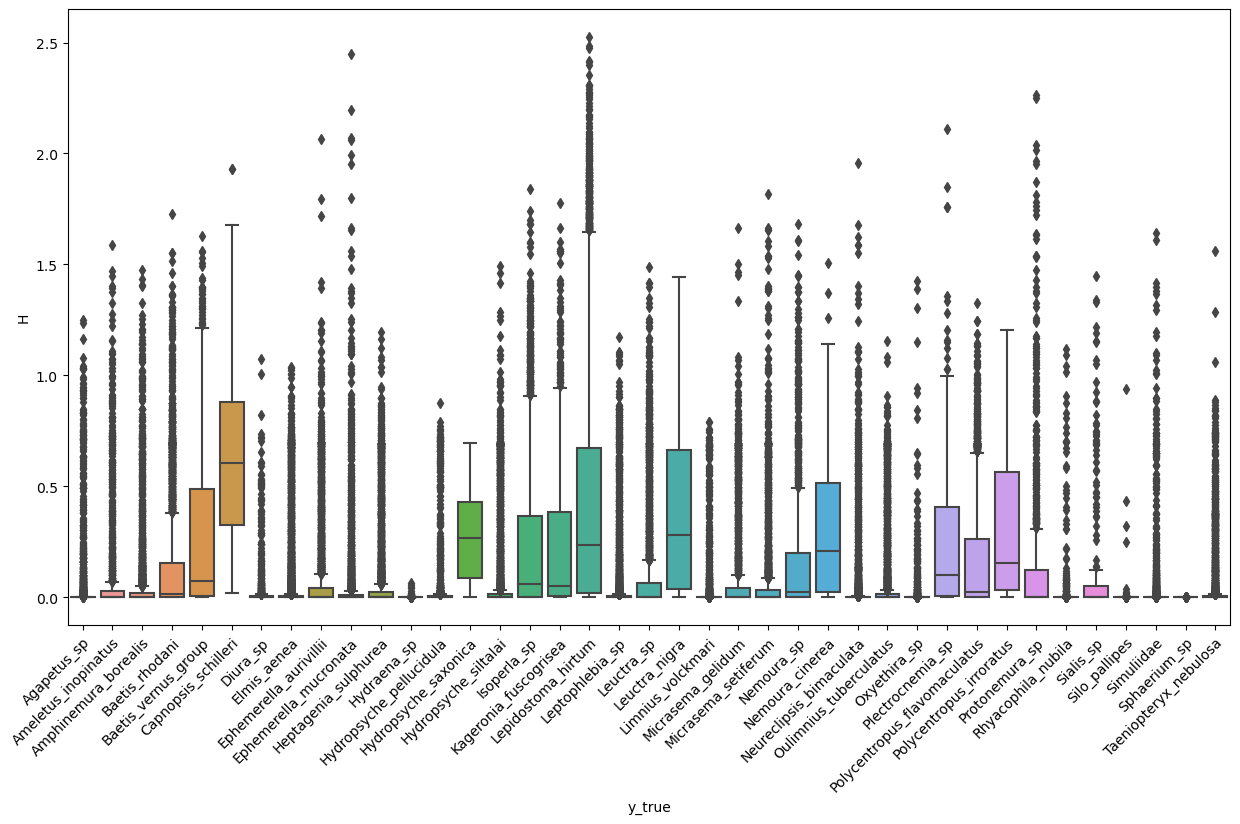

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
sns.boxplot(data=df_pred,
            x="y_true",
            y="H")
plt.xticks(rotation=45, ha="right", rotation_mode="anchor")
plt.show()

c:\Users\E1007914\AppData\Local\miniconda3\envs\taxonomist\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\E1007914\AppData\Local\miniconda3\envs\taxonomist\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\E1007914\AppData\Local\miniconda3\envs\taxonomist\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


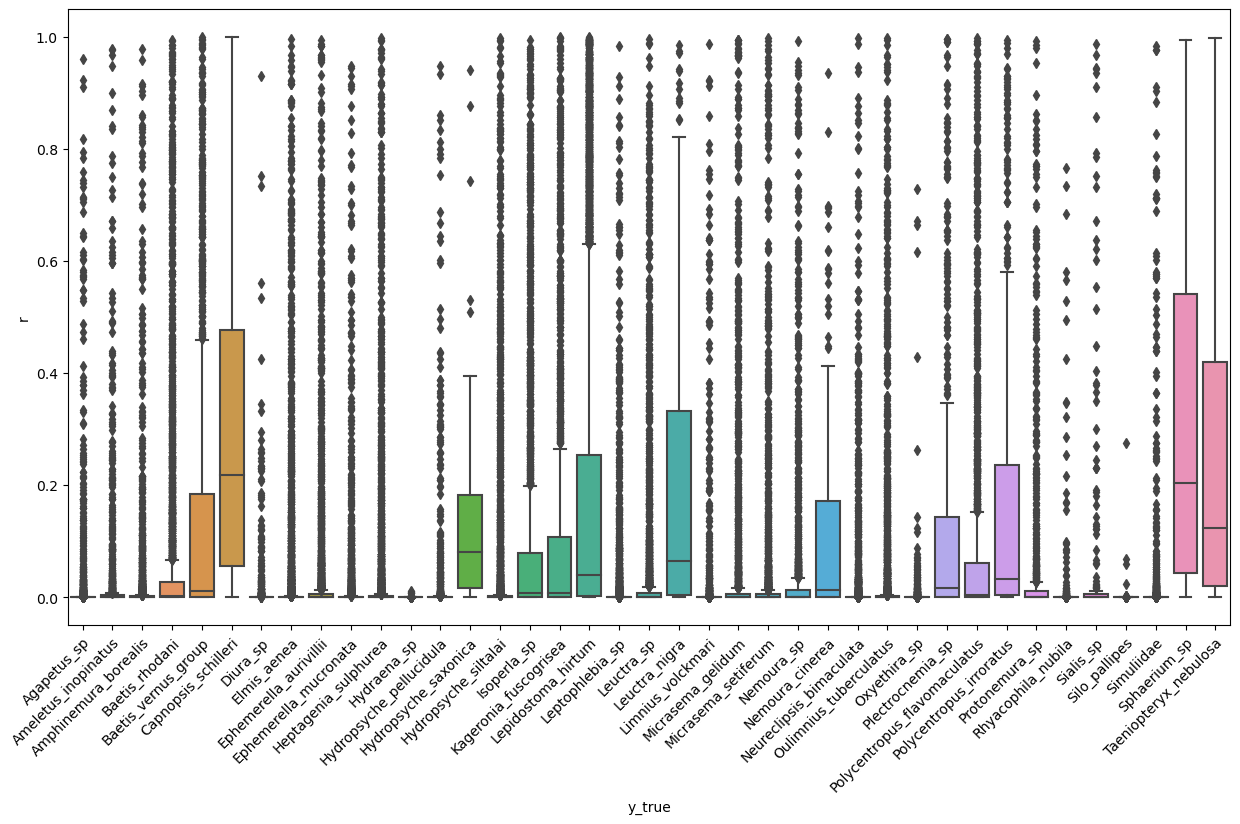

In [17]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df_pred,
            x="y_true",
            y="r")
plt.xticks(rotation=45, ha="right", rotation_mode="anchor")
plt.show()

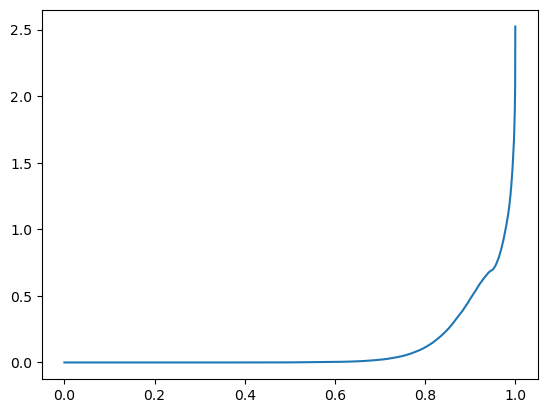

In [60]:
plt.plot(y_pred, sorted_df_H.H)